In [1]:
# Import OPENAI API KEY FROM YOUR .env file
from dotenv import load_dotenv

load_dotenv()

True

### 1. Gather URLs of GMaps places you want to analyse

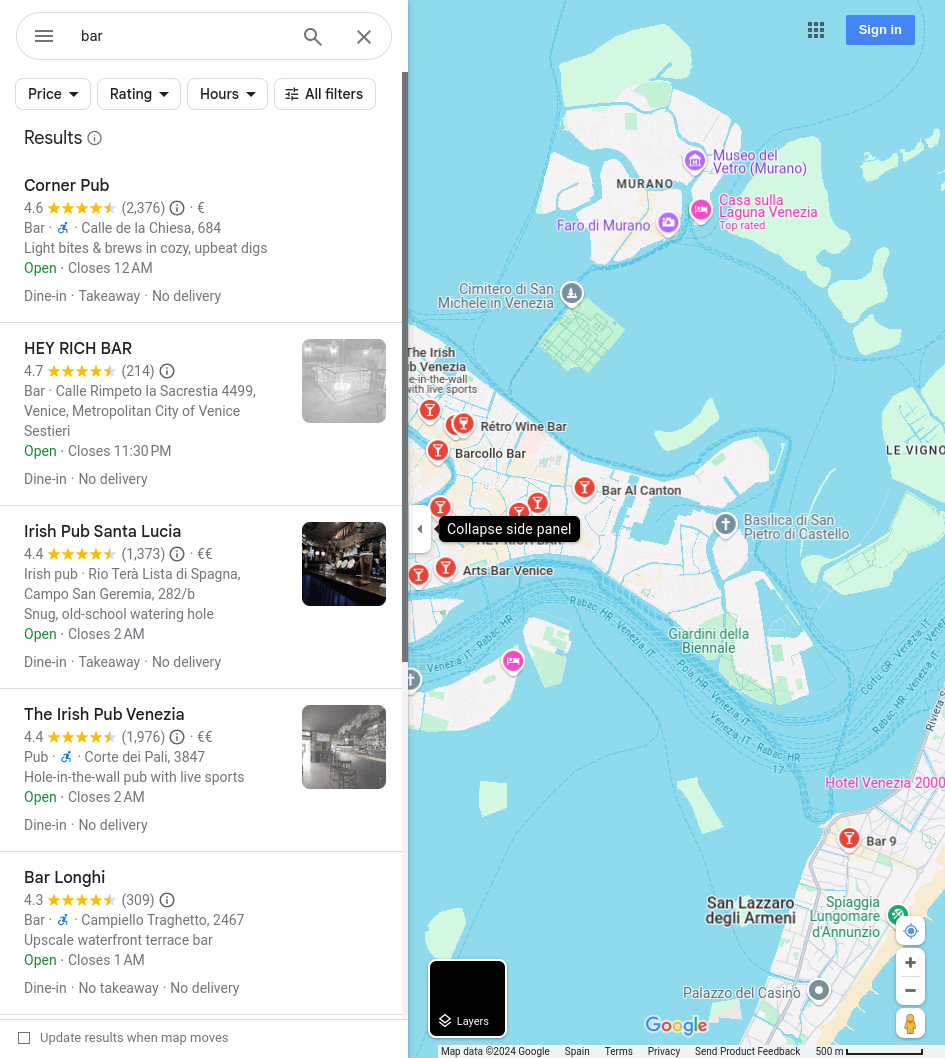

['https://www.google.com/maps/place/Corner+Pub/data=!4m7!3m6!1s0x477eb1d22fab85d9:0x9145af1037806dcf!8m2!3d45.4304293!4d12.3307388!16s%2Fg%2F11cmsvyflb!19sChIJ2YWrL9KxfkcRz22ANxCvRZE?authuser=0&hl=en&rclk=1',
 'https://www.google.com/maps/place/HEY+RICH+BAR/data=!4m7!3m6!1s0x477eb16eaad371f9:0xd3099f593ba72670!8m2!3d45.4353354!4d12.341796!16s%2Fg%2F11rd4bm2pp!19sChIJ-XHTqm6xfkcRcCanO1mfCdM?authuser=0&hl=en&rclk=1',
 'https://www.google.com/maps/place/Irish+Pub+Santa+Lucia/data=!4m7!3m6!1s0x477eb1c1032e53ab:0x23e9b72e36a35242!8m2!3d45.4429302!4d12.3246407!16s%2Fg%2F11bxd7lxb5!19sChIJq1MuA8GxfkcRQlKjNi636SM?authuser=0&hl=en&rclk=1']

In [6]:
from src.get_places import gather_all_places

list_of_places_urls = gather_all_places(
    query="bar",
    coordinates=(45.435271,12.337798,14.03),
    output_file="output/example_places.json",
    limit=10
)
list_of_places_urls[:3]

### 2.1 Extract reviews about a specific topic from a GMaps place

In [12]:
from src.extract_reviews import extract_place

info_store = extract_place(
    topic="aperol spritz",
    place_gmaps_url=list_of_places_urls[0],
    limit=5
)

info_store.sample(min(5, len(info_store)))

,review,date,score,place_url,name,description,address,phone,web
0,Best Aperol Spritz ever 🤩,10 months ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
2,Todo muy bueno. Los aperol spritz muy buenos y...,a year ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
1,El mejor Aperol spritz y más barato!,a year ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
4,Very tasty Aperol Spritz that you can enjoy at...,a year ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
3,Excellent experience! Very good and particular...,a year ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/


### 2.2 Extract reviews from multiple GMaps place running in parallel

In [13]:
from src.extract_multiple import extract_places_batch

import json
with open("list_of_places_urls.json", "r", encoding="utf-8") as f:
    list_of_places_urls = json.load(f)

reviews_store = extract_places_batch(
    topic="aperol spritz", 
    limit=15, 
    # list_of_places_urls=list_of_places_urls,
    input_file="output/example_places.json"
)

import datetime

reviews_store.to_csv(f"example_reviews.csv", index=False)

reviews_store.sample(min(5, len(reviews_store)))

Processing Places:   0%|          | 0/10 [00:00<?, ?it/s, 
]2024-08-28 19:36:42.838 | ERROR | src.extract_reviews:80 - Error in processing https://www.google.com/maps/place/HEY+RICH+BAR/, will skip it. Details: Message: unknown error: net::ERR_CONNECTION_CLOSED
  (Session info: headless chrome=115.0.5790.110)
Stacktrace:
#0 0x557cd6e9a613 <unknown>
#1 0x557cd6bc6537 <unknown>
#2 0x557cd6bbe5a9 <unknown>
#3 0x557cd6badb72 <unknown>
#4 0x557cd6baf2ab <unknown>
#5 0x557cd6badf4d <unknown>
#6 0x557cd6bacf0c <unknown>
#7 0x557cd6bace7e <unknown>
#8 0x557cd6babb3a <unknown>
#9 0x557cd6babf8a <unknown>
#10 0x557cd6bc83f0 <unknown>
#11 0x557cd6c3e4b5 <unknown>
#12 0x557cd6c25a32 <unknown>
#13 0x557cd6c3dd09 <unknown>
#14 0x557cd6c25803 <unknown>
#15 0x557cd6bf968b <unknown>
#16 0x557cd6bfa42e <unknown>
#17 0x557cd6e5bc28 <unknown>
#18 0x557cd6e5faf7 <unknown>
#19 0x557cd6e6a01c <unknown>
#20 0x557cd6e60723 <unknown>
#21 0x557cd6e2f457 <unknown>
#22 0x557cd6e84628 <unknown>
#23 0x557cd6e847b7 <

,review,date,score,place_url,name,description,address,phone,web
47,Very characteristic small wine shop with compe...,2 years ago,5,https://www.google.com/maps/place/Blackjack+Ba...,Blackjack Bar,Warm circular bar offering local tapas plates ...,"calle 30124, Calle Minelli, 1267B, 30124 Venez...",,https://www.facebook.com/pages/Black-Jack/1579...
18,No spritz after 9pm which is odd and unheard o...,a year ago,1,https://www.google.com/maps/place/Irish+Pub+Sa...,Irish Pub Santa Lucia,"Compact hangout offering beer, sandwiches & sn...","Rio Terà Lista di Spagna, Campo San Geremia, 2...",+39 041 524 2880,http://www.irishpubsantalucia.it/
21,The girl behind the counter is fantastic... Gu...,3 years ago,5,https://www.google.com/maps/place/Irish+Pub+Sa...,Irish Pub Santa Lucia,"Compact hangout offering beer, sandwiches & sn...","Rio Terà Lista di Spagna, Campo San Geremia, 2...",+39 041 524 2880,http://www.irishpubsantalucia.it/
34,"This is a great bar, good cheap food and love...",2 months ago,4,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
45,Lovely stop for a spritz and appetizers. Even...,2 years ago,5,https://www.google.com/maps/place/Blackjack+Ba...,Blackjack Bar,Warm circular bar offering local tapas plates ...,"calle 30124, Calle Minelli, 1267B, 30124 Venez...",,https://www.facebook.com/pages/Black-Jack/1579...


In [14]:
import pandas as pd

reviews_store = pd.read_csv("output/example_reviews.csv")

reviews_store.sample(2)

,review,date,score,place_url,name,description,address,phone,web
33,"Great and cheap spritz! Aperol was the best, b...",2 years ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/
29,Paramos a tomar algo. El limoncelo muy rico y ...,3 months ago,5,https://www.google.com/maps/place/Corner+Pub/d...,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/


In [15]:
reviews_store.sample(1)[["name", "description", "address", "phone", "web"]].to_dict("records")

[{'name': 'Bar 9',
  'description': nan,
  'address': 'Via Lepanto, 9, 30126 Lido VE, Italy',
  'phone': '+39 347 344 0712',
  'web': nan}]

In [17]:
from langchain_core.pydantic_v1 import BaseModel, Field


class MuseumRating(BaseModel):
    """
    A model representing the rating and review summary of a museum's audio guides.
    """
    summary: str = Field(description="A summary of the reviews, focused on aperol spritz")
    has_spritz: bool = Field(description="Does this bar serve aperol spritz?")
    rating: int = Field(description="Using score from 1 to 5 how happy are the users of this bar about their aperol spritz? Give 0 if no aperol spritz. Focus on more recent reviews, if contrasting")

from src.places_analysis import analyse_places


places_analysis_store = analyse_places(store=reviews_store, questions_structure=MuseumRating)

places_analysis_store.to_csv(f"output/analysis_example.csv", index=False)

places_analysis_store

,summary,has_spritz,rating,name,description,address,phone,web,review
Bar Longhi,The reviews highlight the experience of having...,True,3,Bar Longhi,"Stylish, old-world hotel cocktail bar with vie...","Campiello Traghetto, 2467, 30124 Venezia VE, I...",+39 041 794611,http://www.thegrittipalace.com/longhi-bar-venice,Very pleasant to have a drink on the pontoon t...
Corner Pub,The reviews overwhelmingly praise the Aperol S...,True,5,Corner Pub,"Chill, lively nook with canal views offering p...","Calle de la Chiesa, 684, 30123 Venezia VE, Italy",+39 349 457 6739,https://cornerpubvenezia.it/,Best Aperol Spritz ever 🤩\n\nEl mejor Aperol s...
Irish Pub Santa Lucia,The reviews indicate that the bar serves Apero...,True,4,Irish Pub Santa Lucia,"Compact hangout offering beer, sandwiches & sn...","Rio Terà Lista di Spagna, Campo San Geremia, 2...",+39 041 524 2880,http://www.irishpubsantalucia.it/,No Aperol Spritz (the drink of Venice) served ...
The Irish Pub Venezia,The reviews indicate that the bar is a popular...,True,4,The Irish Pub Venezia,"Snug Irish bar serving whiskey, Guinness & san...","Corte dei Pali, 3847, 30121 Venezia VE, Italy",+39 041 639 6692,http://www.theirishpubvenezia.com/,Pub guiri donde beben los Erasmus. Para tomar ...
